In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
a_rho = 1
RY_str = 'RY_rho'
import lhapdf
import math
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


In [2]:
df = pd.read_csv("results/csv_H2_D2.csv")
df[df['y_neg_H2']>0].head()

,xbj,Q2,z,zi,y_neg_H2,err_neg_H2,y_pos_H2,err_pos_H2,y_neg_D2,err_neg_D2,...,y_D2_neg_incnorad,y_D2_pos_delta,y_D2_pos_exc,y_D2_pos_rho,y_D2_pos_Dummy,y_D2_pos_incnorad,xs_D2_pos,xs_D2_neg,y_D2_neg_incnorad_yield,y_D2_pos_incnorad_yield
6,0.35,4.0,0.4,0.325,4.52388,0.166880,7.65783,0.189591,9.31305,0.401391,...,1.04072,0.101162,0.086576,0.277516,1.63957,1.00085,0.000000e+00,0.000000e+00,0.0000,0.0000
7,0.35,4.0,0.4,0.375,51.93380,0.565423,93.23420,0.661535,100.31100,1.317340,...,1.06071,1.461480,1.228860,3.281130,18.93660,1.03111,1.476590e-08,1.004240e-08,10.3459,15.2121
8,0.35,4.0,0.4,0.425,55.91060,0.586672,107.75200,0.711176,115.24700,1.412010,...,1.08146,2.075740,1.785290,4.268500,21.55340,1.06023,1.287200e-08,8.549640e-09,128.8520,193.9940
9,0.35,4.0,0.4,0.475,34.59780,0.461501,66.62450,0.559219,71.33960,1.110930,...,1.10296,1.559570,1.397410,3.203590,13.14440,1.08822,1.154370e-08,7.470860e-09,142.8400,220.7100
10,0.35,4.0,0.4,0.525,6.67111,0.202650,12.38220,0.241082,14.70150,0.504316,...,1.12523,0.373651,0.350554,0.804701,2.60301,1.11507,1.044010e-08,6.577180e-09,88.2457,140.0740


In [3]:
df[df['xbj'] == 0.35][df['Q2']==4][df['y_neg_H2']>0]

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/152783922.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['xbj'] == 0.35][df['Q2']==4][df['y_neg_H2']>0]


,xbj,Q2,z,zi,y_neg_H2,err_neg_H2,y_pos_H2,err_pos_H2,y_neg_D2,err_neg_D2,...,y_D2_neg_incnorad,y_D2_pos_delta,y_D2_pos_exc,y_D2_pos_rho,y_D2_pos_Dummy,y_D2_pos_incnorad,xs_D2_pos,xs_D2_neg,y_D2_neg_incnorad_yield,y_D2_pos_incnorad_yield
6,0.35,4.0,0.4,0.325,4.52388,0.166880,7.65783,0.189591,9.31305,0.401391,...,1.04072,0.101162,0.086576,0.277516,1.639570,1.00085,0.000000e+00,0.000000e+00,0.00000,0.00000
7,0.35,4.0,0.4,0.375,51.93380,0.565423,93.23420,0.661535,100.31100,1.317340,...,1.06071,1.461480,1.228860,3.281130,18.936600,1.03111,1.476590e-08,1.004240e-08,10.34590,15.21210
8,0.35,4.0,0.4,0.425,55.91060,0.586672,107.75200,0.711176,115.24700,1.412010,...,1.08146,2.075740,1.785290,4.268500,21.553400,1.06023,1.287200e-08,8.549640e-09,128.85200,193.99400
9,0.35,4.0,0.4,0.475,34.59780,0.461501,66.62450,0.559219,71.33960,1.110930,...,1.10296,1.559570,1.397410,3.203590,13.144400,1.08822,1.154370e-08,7.470860e-09,142.84000,220.71000
10,0.35,4.0,0.4,0.525,6.67111,0.202650,12.38220,0.241082,14.70150,0.504316,...,1.12523,0.373651,0.350554,0.804701,2.603010,1.11507,1.044010e-08,6.577180e-09,88.24570,140.07400
28,0.35,4.0,0.5,0.425,11.41850,0.225939,22.13310,0.327648,25.07840,0.521830,...,1.08146,0.420871,0.361979,0.865469,4.370100,1.06023,0.000000e+00,0.000000e+00,0.00000,0.00000
29,0.35,4.0,0.5,0.475,48.12320,0.463835,88.48570,0.655122,103.25700,1.058860,...,1.10296,2.076500,1.860590,4.265450,17.501300,1.08822,1.296760e-08,8.421430e-09,29.50910,45.43900
30,0.35,4.0,0.5,0.525,56.90650,0.504390,86.82460,0.648944,126.97700,1.174200,...,1.12523,2.504120,2.349330,5.392920,17.444800,1.11507,1.105320e-08,6.986780e-09,117.31200,185.58800
31,0.35,4.0,0.5,0.575,45.23860,0.449718,63.04060,0.552963,94.91940,1.015210,...,1.14825,2.187190,2.145630,5.037000,12.851700,1.14078,9.596860e-09,5.910530e-09,117.60200,190.94800
32,0.35,4.0,0.5,0.625,17.81180,0.282189,24.98750,0.348135,36.21740,0.627101,...,1.17203,0.999860,1.021650,2.472120,5.057660,1.16536,8.640270e-09,5.205680e-09,85.30210,141.58200


In [4]:
def Get_weighted(values,errs):
    sums = 0
    sig = 0
    for i in range(len(values)):
        for j in range(len(errs)):
            sums+=values[i]/(errs[i]*errs[i])
            sig+=1/(errs[i]*errs[i])
    return sums/sig,math.sqrt(1/sig)   


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/3463453503.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/3463453503.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/3463453503.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df

<class 'pandas.core.series.Series'>


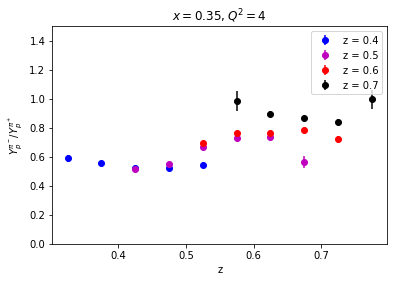

In [5]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)


err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'b',fmt = 'o',label = 'z = 0.4')



#diff_ratio_1 = diff_ratio.copy()
#err_diff_1 = err_diff.copy()


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_rho']



y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'm',fmt = 'o',label = 'z = 0.5')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_rho']



y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'r',fmt = 'o',label = 'z = 0.6')


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_rho']



y_neg_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'k',fmt = 'o',label = 'z = 0.7')


plt.title(r'$x = 0.35,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'${Y_p^{\pi^-}}/{Y_p^{\pi^+}}$')
plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2D2runs/H2_RY_x35Q4_datadeltaexc.pdf")

print(type(z_axis))

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/395347112.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/395347112.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/395347112.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df

<class 'pandas.core.series.Series'>


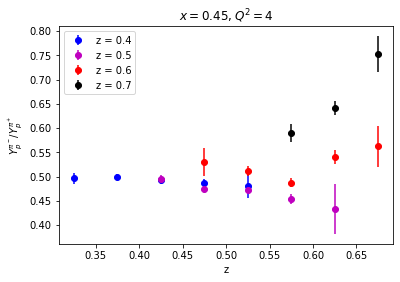

In [6]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)


err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'b',fmt = 'o',label = 'z = 0.4')



#diff_ratio_1 = diff_ratio.copy()
#err_diff_1 = err_diff.copy()


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'm',fmt = 'o',label = 'z = 0.5')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'r',fmt = 'o',label = 'z = 0.6')


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'k',fmt = 'o',label = 'z = 0.7')


plt.title(r'$x = 0.45,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'${Y_p^{\pi^-}}/{Y_p^{\pi^+}}$')
#plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2D2runs/H2_RY_x45Q4_datadeltaexc.pdf")

print(type(z_axis))

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/349991816.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/349991816.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/349991816.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index

<class 'pandas.core.series.Series'>


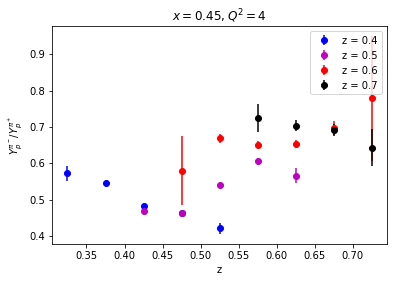

In [7]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)


err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'b',fmt = 'o',label = 'z = 0.4')



#diff_ratio_1 = diff_ratio.copy()
#err_diff_1 = err_diff.copy()


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'm',fmt = 'o',label = 'z = 0.5')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'r',fmt = 'o',label = 'z = 0.6')


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'k',fmt = 'o',label = 'z = 0.7')


plt.title(r'$x = 0.45,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'${Y_p^{\pi^-}}/{Y_p^{\pi^+}}$')
#plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2D2runs/H2_RY_x45Q475_datadeltaexc.pdf")

print(type(z_axis))

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/4223257274.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/4223257274.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/4223257274.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4][

<class 'pandas.core.series.Series'>


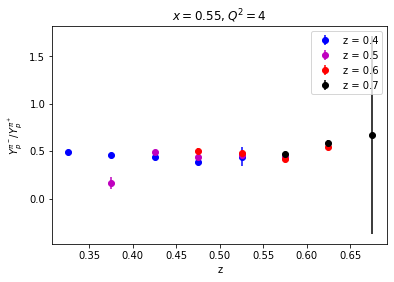

In [8]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)


err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'b',fmt = 'o',label = 'z = 0.4')



#diff_ratio_1 = diff_ratio.copy()
#err_diff_1 = err_diff.copy()


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'm',fmt = 'o',label = 'z = 0.5')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'r',fmt = 'o',label = 'z = 0.6')


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_delta']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_exc']

y_neg_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'k',fmt = 'o',label = 'z = 0.7')


plt.title(r'$x = 0.55,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'${Y_p^{\pi^-}}/{Y_p^{\pi^+}}$')
#plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2D2runs/H2_RY_x55Q475_datadeltaexc.pdf")

print(type(z_axis))

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1482057948.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1482057948.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1482057948.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  

<class 'pandas.core.series.Series'>


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1482057948.py:66: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['zi']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1482057948.py:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_H2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1482057948.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_Dummy']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1482057948.py:71: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_H2']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T

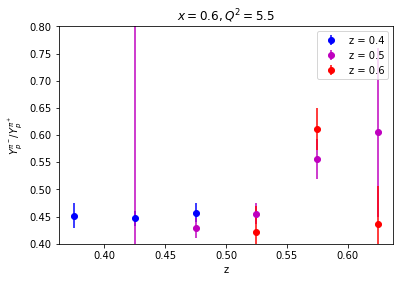

In [9]:
# all bgs subtracted
y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_D2']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)


err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)


#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'b',fmt = 'o',label = 'z = 0.4')



#diff_ratio_1 = diff_ratio.copy()
#err_diff_1 = err_diff.copy()


y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'm',fmt = 'o',label = 'z = 0.5')



y_neg_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_delta']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_rho']
y_pos_H2_bg = 0.262*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_rho']


y_neg_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_H2']-y_neg_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_neg_incnorad']
y_pos_H2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_H2']-y_pos_H2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_H2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['zi']
y_H2 = y_neg_H2/y_pos_H2

error_neg_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_H2']
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_Dummy']
error_pos_H2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_H2']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_Dummy']

err_neg_H2 = np.sqrt(error_neg_H2**2+0.262**2*error_neg_Dummy**2)
err_pos_H2 = np.sqrt(error_pos_H2**2+0.262**2*error_pos_Dummy**2)

err_RY_H2 = y_H2*np.sqrt(err_neg_H2**2/y_neg_H2**2+err_pos_H2**2/y_pos_H2**2)



#plt.plot(z_axis_1,diff_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,y_H2,err_RY_H2,color = 'r',fmt = 'o',label = 'z = 0.6')




plt.title(r'$x = 0.6,Q^2 = 5.5$')
plt.xlabel('z')
plt.ylabel(r'${Y_p^{\pi^-}}/{Y_p^{\pi^+}}$')
plt.ylim(0.4,0.8)
plt.legend()
plt.savefig("results/H2D2runs/H2_RY_x6Q55_datadeltaexc.pdf")

print(type(z_axis))

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1863662960.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1863662960.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1863662960.py:6: UserWarning: Boolean Series

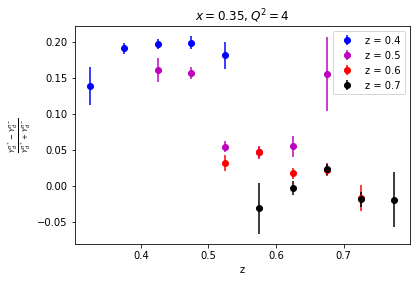

In [10]:
# all bgs subtracted
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum
error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'm',fmt = 'o',label = 'z = 0.5')


y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'r',fmt = 'o',label = 'z = 0.6')




y_neg_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.35][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.35,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_d^{\pi^+}-Y_d^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
#plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2D2runs/D2_diffsum_x35Q4_datadeltaexc.pdf")


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1949473239.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1949473239.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/1949473239.py:6: UserWarning: Boolean Series

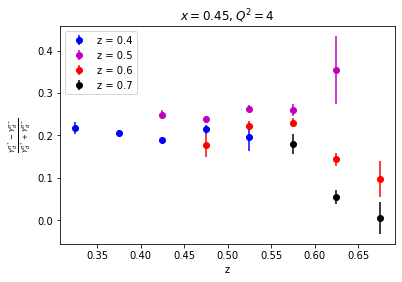

In [11]:
# all bgs subtracted
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.4]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.5]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'm',fmt = 'o',label = 'z = 0.5')


y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.6]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'r',fmt = 'o',label = 'z = 0.6')




y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4][df['z']==0.7]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.45,Q^2 = 4$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_d^{\pi^+}-Y_d^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
#plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2D2runs/D2_diffsum_x45Q4_datadeltaexc.pdf")


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/3944892082.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/3944892082.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/3944892082.py:6: Use

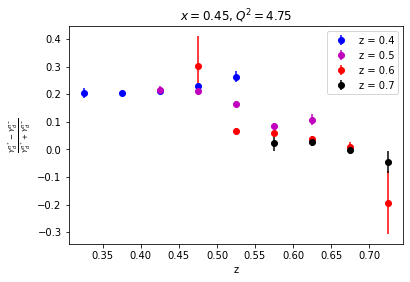

In [12]:
# all bgs subtracted
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum
error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'm',fmt = 'o',label = 'z = 0.5')


y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'r',fmt = 'o',label = 'z = 0.6')




y_neg_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.45][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.45,Q^2 = 4.75$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_d^{\pi^+}-Y_d^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
#plt.ylim(0,1.5)
plt.legend()
plt.savefig("results/H2D2runs/D2_diffsum_x45Q475_datadeltaexc.pdf")


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2059905943.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2059905943.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2059905943.py:6: Use

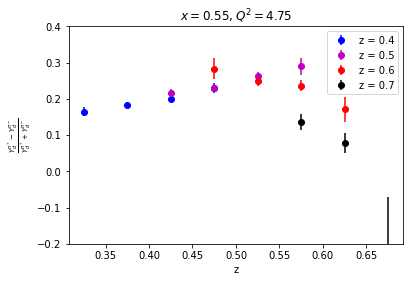

In [13]:
# all bgs subtracted
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum
error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.4]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'b',fmt = 'o',label = 'z = 0.4')



y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.5]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'm',fmt = 'o',label = 'z = 0.5')


y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.6]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'r',fmt = 'o',label = 'z = 0.6')




y_neg_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_Dummy']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_delta']+df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.55][df['Q2']==4.75][df['z']==0.7]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.7')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'k',fmt = 'o',label = 'z = 0.7')

plt.title(r'$x = 0.55,Q^2 = 4.75$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_d^{\pi^+}-Y_d^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
plt.ylim(-0.2,0.4)
plt.legend()
plt.savefig("results/H2D2runs/D2_diffsum_x55Q475_datadeltaexc.pdf")


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/3155611858.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/3155611858.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_rho']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/3155611858.py:6: UserWarning

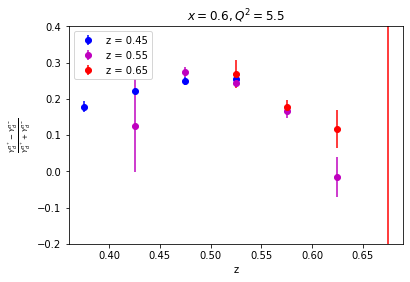

In [14]:
# all bgs subtracted
y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum
error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.45]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'b',fmt = 'o',label = 'z = 0.45')



y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.55]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.5')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'm',fmt = 'o',label = 'z = 0.55')


y_neg_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_rho']
y_pos_D2_bg = 0.245*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_Dummy']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_delta']+df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_exc']+a_rho*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_rho']


y_neg_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_neg_D2']-y_neg_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_neg_incnorad']
y_pos_D2 = (df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_pos_D2']-y_pos_D2_bg)*df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['y_D2_pos_incnorad']
z_axis = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['zi']
y_D2_diff = y_pos_D2-y_neg_D2
y_D2_sum = y_pos_D2+y_neg_D2
D2_ratio = y_D2_diff/y_D2_sum

error_neg_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_Dummy']
error_pos_Dummy = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_Dummy']
error_neg_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_neg_D2']
error_pos_D2 = df[df['xbj'] == 0.6][df['Q2']==5.5][df['z']==0.65]['err_pos_D2']

err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


#plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.6')
plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = 'r',fmt = 'o',label = 'z = 0.65')





plt.title(r'$x = 0.6,Q^2 = 5.5$')
plt.xlabel('z')
plt.ylabel(r'$\frac{Y_d^{\pi^+}-Y_d^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
plt.ylim(-0.2,0.4)
plt.legend()
plt.savefig("results/H2D2runs/D2_diffsum_x55Q475_datadeltaexc.pdf")


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/313995863.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj']==xbj]['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/313995863.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj'] == xbj][df['Q2']==Q2][df['z']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/313995863.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj'] == xbj][df['Q2']==Q2][df['z']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/313995863.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj'] == xbj][df['Q2']==Q2][df['z']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/313995863.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame inde

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/313995863.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj']==xbj]['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/313995863.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj'] == xbj][df['Q2']==Q2][df['z']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/313995863.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj'] == xbj][df['Q2']==Q2][df['z']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/313995863.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj'] == xbj][df['Q2']==Q2][df['z']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/313995863.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index

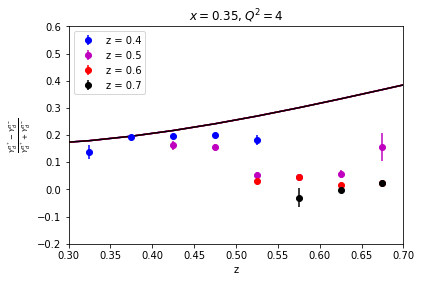

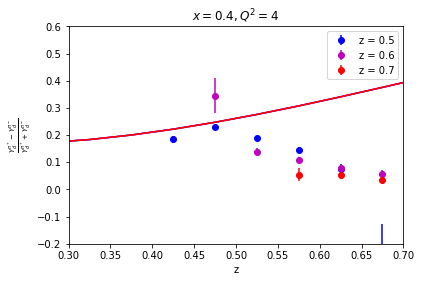

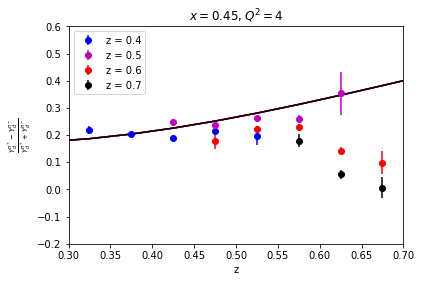

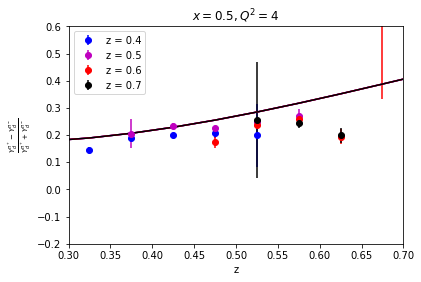

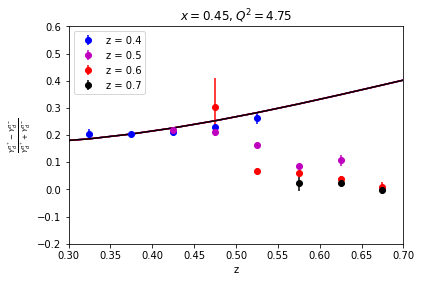

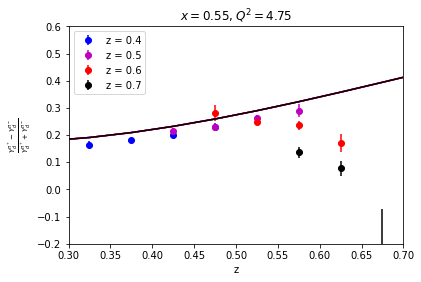

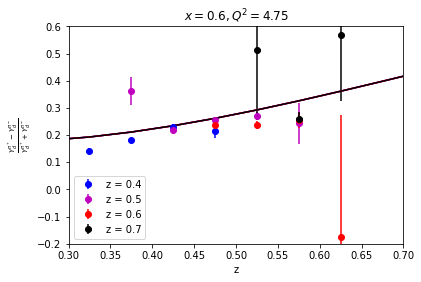

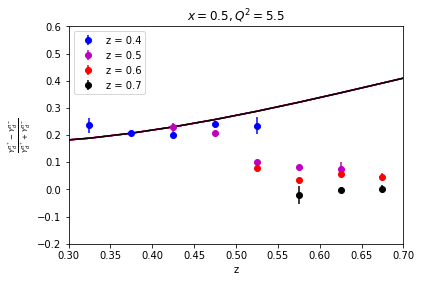

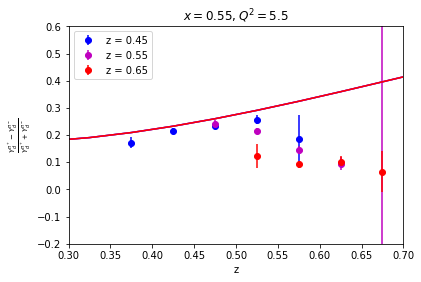

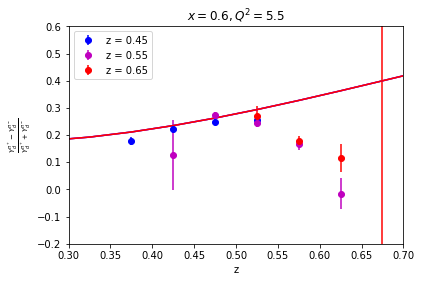

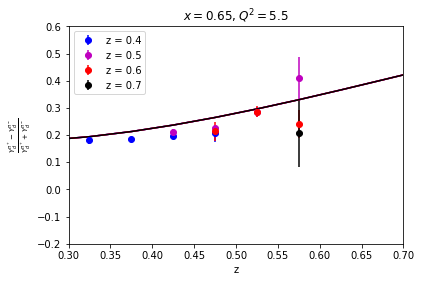

In [15]:

Q2s = [4,4.75,5.5]
colors = ['b','m','r','k']

for Q2 in Q2s:
    xbjs = df[df['Q2']==Q2]['xbj'].unique()
    #print(xbjs)
    for xbj in xbjs:
        zs = df[df['Q2']==Q2][df['xbj']==xbj]['z'].unique()
        fig = plt.figure()
        i_color = 0
        for z in zs:
            row = df[df['xbj'] == xbj][df['Q2']==Q2][df['z']==z]
            y_neg_D2_bg = 0.245*row['y_neg_Dummy']+row['y_D2_neg_delta']+row['y_D2_neg_exc']+a_rho*row['y_D2_neg_rho']
            y_pos_D2_bg = 0.245*row['y_pos_Dummy']+row['y_D2_pos_delta']+row['y_D2_pos_exc']+a_rho*row['y_D2_pos_rho']

            
            y_neg_D2 = (row['y_neg_D2']-y_neg_D2_bg)*row['y_D2_neg_incnorad']
            y_pos_D2 = (row['y_pos_D2']-y_pos_D2_bg)*row['y_D2_pos_incnorad']
            z_axis = row['zi']
            y_D2_diff = y_pos_D2-y_neg_D2
            y_D2_sum = y_pos_D2+y_neg_D2
            D2_ratio = y_D2_diff/y_D2_sum
            error_neg_Dummy = row['err_neg_Dummy']
            error_pos_Dummy = row['err_pos_Dummy']
            error_neg_D2 = row['err_neg_D2']
            error_pos_D2 = row['err_pos_D2']

            err_neg_D2 = np.sqrt(error_neg_D2**2+0.245**2*error_neg_Dummy**2)
            err_pos_D2 = np.sqrt(error_pos_D2**2+0.245**2*error_pos_Dummy**2)

            err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
            err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

            err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


            #plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
            plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = colors[i_color],fmt = 'o',label = f'z = {z}')
            D2_diffsum_ratio = []
            for z_had in z_axis:
                Q = math.sqrt(Q2)
                u = JAM20_PDF.xfxQ(2,xbj,Q)
                ub = JAM20_PDF.xfxQ(-2,xbj,Q)
                d = JAM20_PDF.xfxQ(1,xbj,Q)
                db = JAM20_PDF.xfxQ(-1,xbj,Q)
                duplus = JAM20.xfxQ(2,z_had,Q)
                duminus = JAM20.xfxQ(-2,z_had,Q)
                D2_diffsum_ratio.append(3*(u-ub+d-db)*(duplus-duminus)/(5*(u+d+ub+db)*(duplus+duminus)))
            plt.plot(z_axis,D2_diffsum_ratio,color = colors[i_color])


            i_color = i_color+1



        
        plt.title(f'$x = {xbj},Q^2 = {Q2}$')
        plt.xlabel('z')
        plt.ylabel(r'$\frac{Y_d^{\pi^+}-Y_d^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
        plt.ylim(-0.2,0.6)
        plt.xlim(0.3,0.7)
        plt.legend()
        plt.savefig(f"results/H2D2runs/D2_diffsum_x{xbj}Q{Q2}_H2D2runs.pdf")


        

In [16]:
Q2s = [4,4.75,5.5]
colors = ['b','m','r','k']

df = pd.read_csv("results/csv.csv")
df.head()

,Q2,Q2_corr,Q2_corr_err,xbj_set,xbj,xbj_corr,xbj_corr_err,z_set,z,z_corr,...,yield_neg_incnorad,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp
0,4.0,3.37275,0.010472,0.35,0.275,0.278487,0.000075,0.4,0.325,0.344239,...,5.60438,5.37980,8.1510,8.7125,9.62358,6.52152,0.273047,0.337436,2.22258,-8.46546
1,4.0,3.37644,0.007994,0.35,0.275,0.282134,0.000071,0.4,0.375,0.373989,...,35.40190,33.96720,52.2889,50.8403,9.47924,6.17179,0.276137,0.365692,2.38734,-1.68022
2,4.0,3.78996,0.016357,0.35,0.325,0.324579,0.000101,0.4,0.375,0.376585,...,55.36860,51.16280,83.3495,81.0216,8.77394,5.71100,0.316565,0.366879,2.34447,-3.44549
3,4.0,4.20543,0.016580,0.35,0.375,0.371190,0.000095,0.4,0.375,0.380968,...,29.19430,26.20740,44.6229,40.6557,8.01172,5.19479,0.360333,0.369801,2.30069,-5.24857
4,4.0,4.59366,0.011313,0.35,0.425,0.418406,0.000089,0.4,0.375,0.386491,...,7.62266,6.63342,11.7916,10.0885,7.27139,4.67926,0.404611,0.374031,2.26197,-6.84323


4
[0.35 0.4  0.45 0.5 ]
4
0.35
[0.4 0.5]
4
0.4
[0.5 0.6 0.7]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:13: UserWarning: Boolean Series key will b

4
0.45
[0.4 0.5 0.6 0.7]
4
0.5
[0.4 0.5 0.6 0.7]
4.75
[0.45 0.5  0.55 0.6 ]
4.75
0.45
[0.4 0.5]
4.75
0.5
[0.4 0.5 0.6 0.7]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:13: UserWarning: Boolean Series key will b

4.75
0.55
[0.4 0.5 0.6 0.7]
4.75
0.6
[0.4 0.5 0.6 0.7]
5.5
[0.5  0.55 0.6  0.65]
5.5
0.5
[0.4 0.5 0.6]
5.5
0.55
[0.45 0.55]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/2744329263.py:6: UserWarning: Boolean Series key will 

5.5
0.6
[0.45 0.55 0.65]
5.5
0.65
[0.4 0.5 0.6]


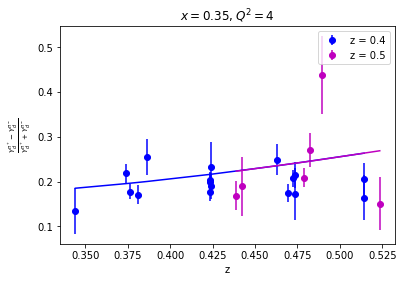

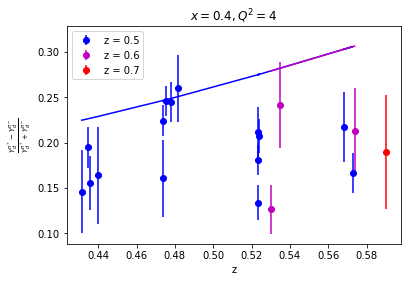

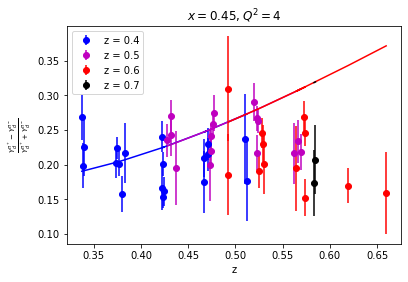

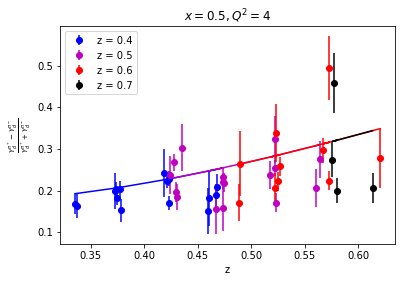

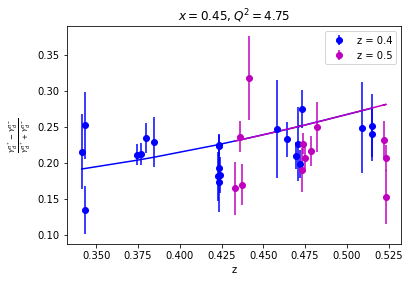

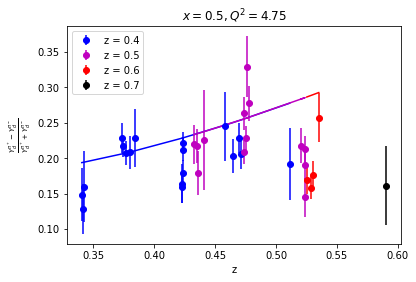

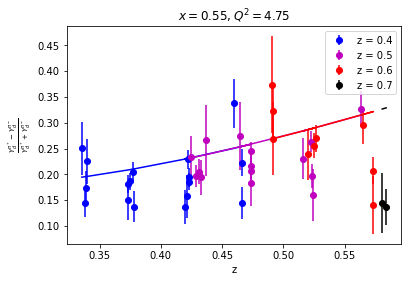

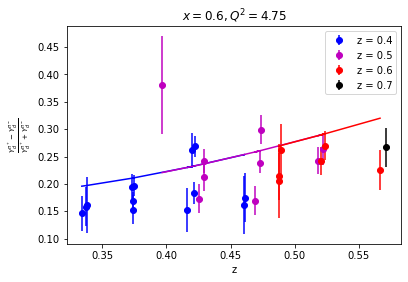

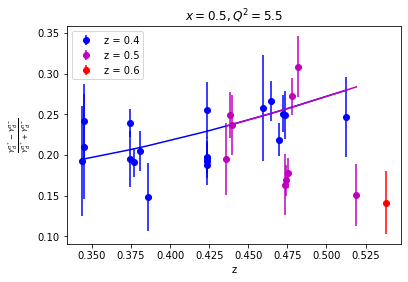

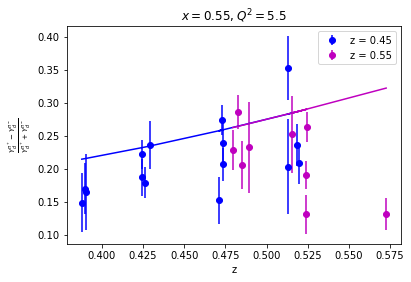

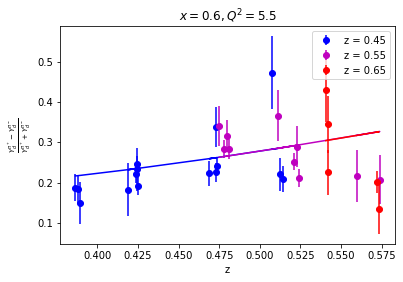

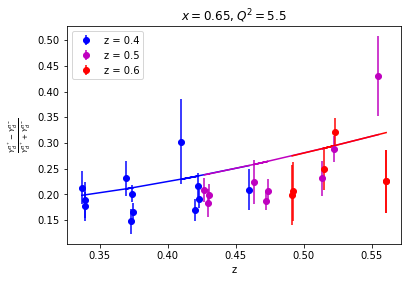

In [17]:

for Q2 in Q2s:
    xbjs = df[df['Q2']==Q2]['xbj_set'].unique()
    print(Q2)
    print(xbjs)
    for xbj in xbjs:
        zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
        print(Q2)
        print(xbj)
        print(zs)
        fig = plt.figure()
        i_color = 0
        for z in zs:
            row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
            y_neg_D2 = row['yield_neg']
            y_pos_D2 = row['yield_pos']
            z_axis = row['z_corr']
            RY = row[RY_str]
            D2_ratio = (1-RY)/(1+RY)
            RY_err = row['error']
            err_D2_ratio = 2*RY_err/(1+RY)**2
            #y_D2_diff = y_pos_D2-y_neg_D2
            #y_D2_sum = y_pos_D2+y_neg_D2
            #D2_ratio = y_D2_diff/y_D2_sum
            #print(D2_ratio)
            #err_neg_D2 = row['error_neg']
            #err_pos_D2 = row['error_pos']

            #err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
            #err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

            #err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


            #plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
            plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = colors[i_color],fmt = 'o',label = f'z = {z}')
            D2_diffsum_ratio = []
            for z_had in z_axis:
                Q = math.sqrt(Q2)
                u = JAM20_PDF.xfxQ(2,xbj,Q)
                ub = JAM20_PDF.xfxQ(-2,xbj,Q)
                d = JAM20_PDF.xfxQ(1,xbj,Q)
                db = JAM20_PDF.xfxQ(-1,xbj,Q)
                duplus = JAM20.xfxQ(2,z_had,Q)
                duminus = JAM20.xfxQ(-2,z_had,Q)
                D2_diffsum_ratio.append(3*(u-ub+d-db)*(duplus-duminus)/(5*(u+d+ub+db)*(duplus+duminus)))
            plt.plot(z_axis,D2_diffsum_ratio,color = colors[i_color])

            i_color = i_color+1
            



        
        plt.title(f'$x = {xbj},Q^2 = {Q2}$')
        plt.xlabel('z')
        plt.ylabel(r'$\frac{Y_d^{\pi^+}-Y_d^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
        #plt.ylim(-0.2,0.4)
        plt.legend()
        plt.savefig(f"results/H2D2runs/D2_diffsum_x{xbj}Q{Q2}_datadeltaexcrho.pdf")



4
[0.35 0.4  0.45 0.5 ]
4
0.35
[0.4 0.5]
4
0.4
[0.5 0.6 0.7]
4
0.45
[0.4 0.5 0.6 0.7]
4
0.5
[0.4 0.5 0.6 0.7]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:13: UserWarning: Boolean Series key will be rei

4.75
[0.45 0.5  0.55 0.6 ]
4.75
0.45
[0.4 0.5]
4.75
0.5
[0.4 0.5 0.6 0.7]
4.75
0.55
[0.4 0.5 0.6 0.7]
4.75
0.6
[0.4 0.5 0.6 0.7]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:13: UserWarning: Boolean Series key will be r

5.5
[0.5  0.55 0.6  0.65]
5.5
0.5
[0.4 0.5 0.6]
5.5
0.55
[0.45 0.55]
5.5
0.6
[0.45 0.55 0.65]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/616307089.py:6: UserWarning: Boolean Series key will be re

5.5
0.65
[0.4 0.5 0.6]


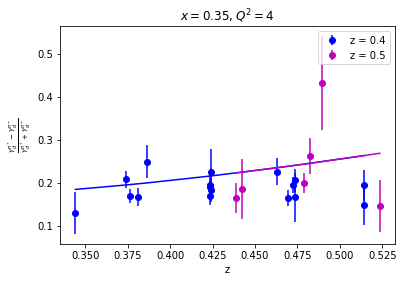

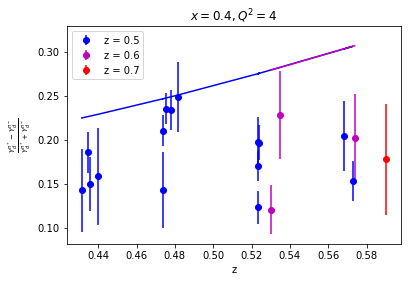

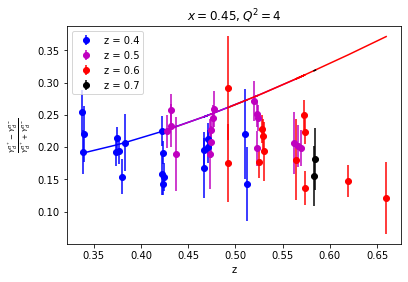

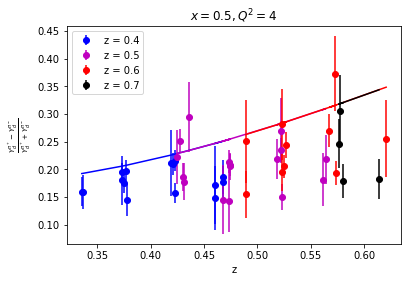

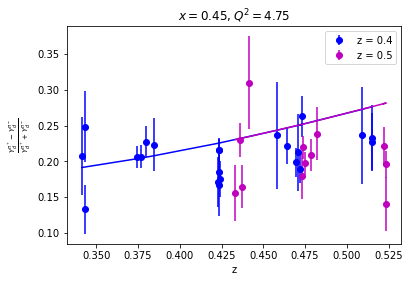

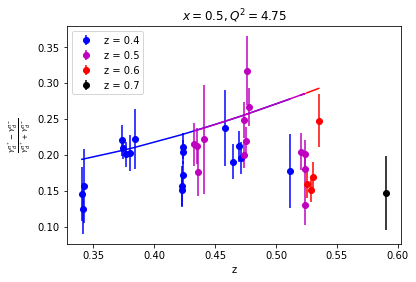

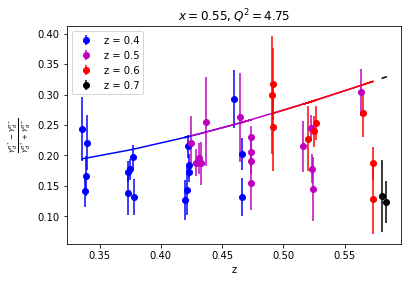

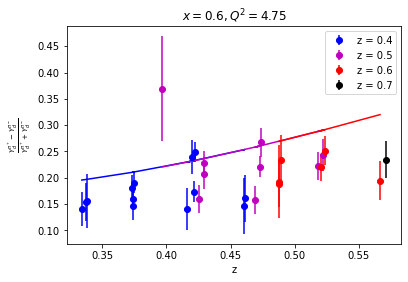

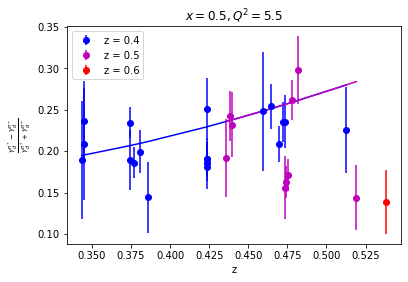

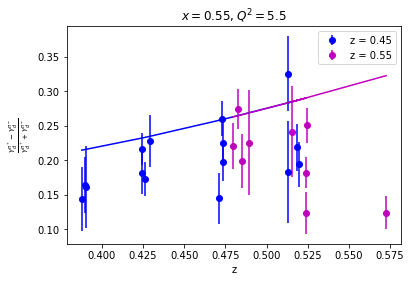

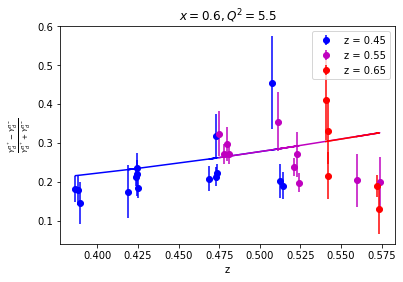

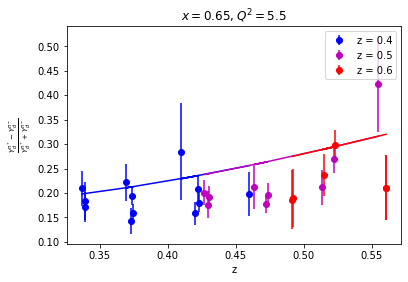

In [18]:

for Q2 in Q2s:
    xbjs = df[df['Q2']==Q2]['xbj_set'].unique()
    print(Q2)
    print(xbjs)
    for xbj in xbjs:
        zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
        print(Q2)
        print(xbj)
        print(zs)
        fig = plt.figure()
        i_color = 0
        for z in zs:
            row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
            y_neg_D2 = row['yield_neg']
            y_pos_D2 = row['yield_pos']
            z_axis = row['z_corr']
            #RY = row['RY']
            #D2_ratio = (1-RY)/(1+RY)
            #RY_err = row['error']
            #err_D2_ratio = 2*RY_err/(1+RY)**2
            y_D2_diff = y_pos_D2-y_neg_D2
            y_D2_sum = y_pos_D2+y_neg_D2
            D2_ratio = y_D2_diff/y_D2_sum
            #print(D2_ratio)
            err_neg_D2 = row['error_neg']
            err_pos_D2 = row['error_pos']

            err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
            err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)

            err_D2_ratio = D2_ratio*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)


            #plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
            plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = colors[i_color],fmt = 'o',label = f'z = {z}')
            
            D2_diffsum_ratio = []
            for z_had in z_axis:
                Q = math.sqrt(Q2)
                u = JAM20_PDF.xfxQ(2,xbj,Q)
                ub = JAM20_PDF.xfxQ(-2,xbj,Q)
                d = JAM20_PDF.xfxQ(1,xbj,Q)
                db = JAM20_PDF.xfxQ(-1,xbj,Q)
                duplus = JAM20.xfxQ(2,z_had,Q)
                duminus = JAM20.xfxQ(-2,z_had,Q)
                D2_diffsum_ratio.append(3*(u-ub+d-db)*(duplus-duminus)/(5*(u+d+ub+db)*(duplus+duminus)))
            plt.plot(z_axis,D2_diffsum_ratio,color = colors[i_color])
            
            i_color = i_color+1
            



        
        plt.title(f'$x = {xbj},Q^2 = {Q2}$')
        plt.xlabel('z')
        plt.ylabel(r'$\frac{Y_d^{\pi^+}-Y_d^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
        #plt.ylim(-0.2,0.4)
        plt.legend()
        #plt.savefig(f"results/H2D2runs/D2_diffsum_x{xbj}Q{Q2}_datadeltaexc.pdf")



/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/4194578310.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/4194578310.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/4194578310.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z][df['z']==zi]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/4194578310.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_9546/4194578310.py:13: UserWarning: Boolean Seri

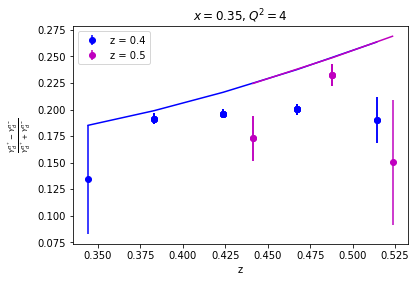

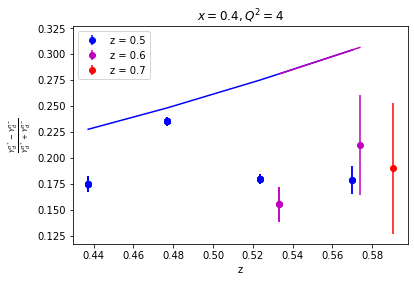

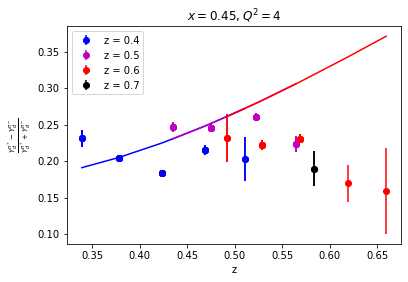

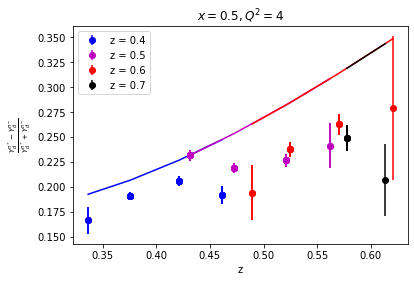

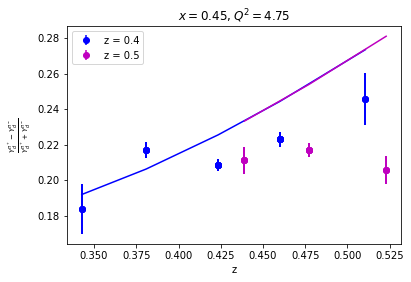

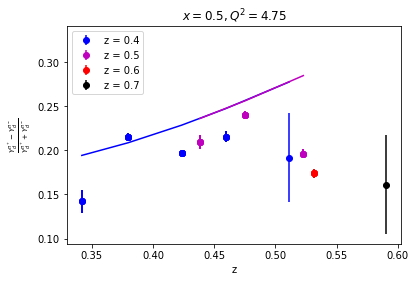

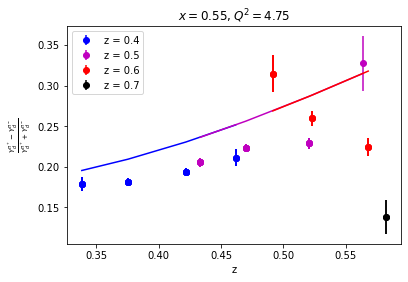

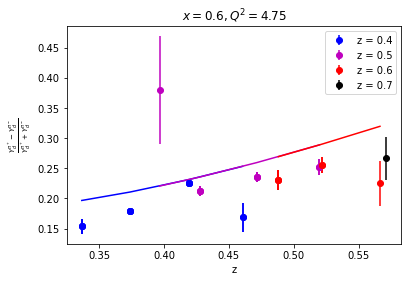

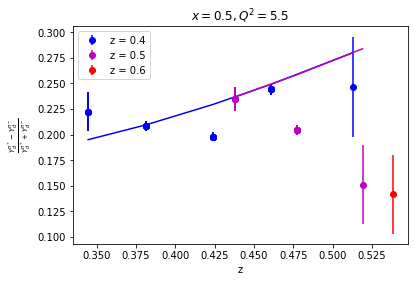

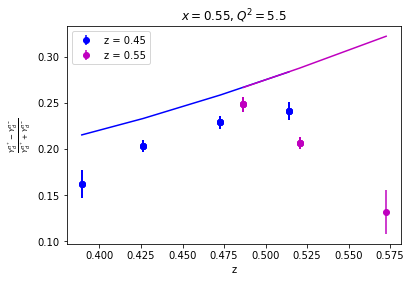

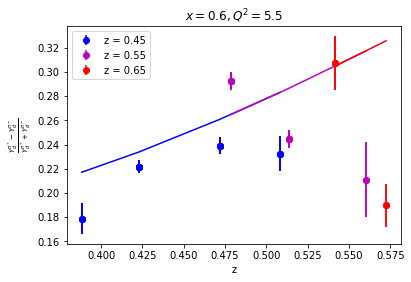

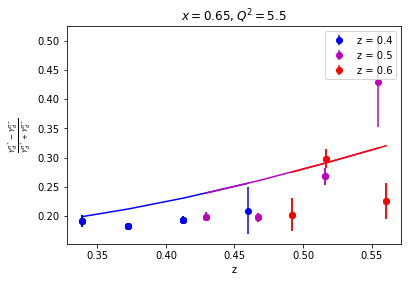

In [19]:

for Q2 in Q2s:
    xbjs = df[df['Q2']==Q2]['xbj_set'].unique()
    #print(Q2)
    #print(xbjs)
    for xbj in xbjs:
        zs = df[df['Q2']==Q2][df['xbj_set']==xbj]['z_set'].unique()
        #print(Q2)
        #print(xbj)
        #print(zs)
        fig = plt.figure()
        i_color = 0
        for z in zs:
            row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z]
            z_center = row['z']
            z_axis = []
            D2_ratio = []
            err_D2_ratio = []
            for zi in z_center:
                row = df[df['xbj_set'] == xbj][df['Q2']==Q2][df['z_set']==z][df['z']==zi]
                
                y_neg_D2 = row['yield_neg']
                y_pos_D2 = row['yield_pos']
                z_axiss = row['z_corr']
                z_axiss_err = row['z_corr_err']
                z_axis_i = Get_weighted(np.asarray(z_axiss),np.asarray(z_axiss_err))[0]
                z_axis.append(z_axis_i)
                
                RYs = row[RY_str]
                D2_ratios = (1-np.asarray(RYs))/(1+np.asarray(RYs))
                RY_errs = row['error']
                err_D2_ratios = 2*np.asarray(RY_errs)/(1+np.asarray(RYs))**2
                #print(D2_ratios)
                
                '''
                y_D2_diff = y_pos_D2-y_neg_D2
                y_D2_sum = y_pos_D2+y_neg_D2
                D2_ratios = y_D2_diff/y_D2_sum
                #print(D2_ratio)
                err_neg_D2 = row['error_neg']
                err_pos_D2 = row['error_pos']

                err_diff_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
                err_sum_D2 = np.sqrt(err_neg_D2**2+err_pos_D2**2)
                err_D2_ratios = D2_ratios*np.sqrt(err_diff_D2**2/y_D2_diff**2+err_sum_D2**2/y_D2_sum**2)
                '''
                D2_ratio_i = Get_weighted(np.asarray(D2_ratios),np.asarray(err_D2_ratios))[0]
                D2_ratio.append(D2_ratio_i)
                err_D2_ratio_i = Get_weighted(np.asarray(D2_ratios),np.asarray(err_D2_ratios))[1]
                err_D2_ratio.append(err_D2_ratio_i)
                #print(D2_ratio_i)
                #plt.plot(z_axis_1,sum_ratio_1,'bo',label = 'z = 0.4')
            #print(len(z_axis),len(D2_ratio),len(err_D2_ratio))
            plt.errorbar(z_axis,D2_ratio,err_D2_ratio,color = colors[i_color],fmt = 'o',label = f'z = {z}')
            
            D2_diffsum_ratio = []
            for z_had in z_axis:
                Q = math.sqrt(Q2)
                u = JAM20_PDF.xfxQ(2,xbj,Q)
                ub = JAM20_PDF.xfxQ(-2,xbj,Q)
                d = JAM20_PDF.xfxQ(1,xbj,Q)
                db = JAM20_PDF.xfxQ(-1,xbj,Q)
                duplus = JAM20.xfxQ(2,z_had,Q)
                duminus = JAM20.xfxQ(-2,z_had,Q)
                D2_diffsum_ratio.append(3*(u-ub+d-db)*(duplus-duminus)/(5*(u+d+ub+db)*(duplus+duminus)))
            plt.plot(z_axis,D2_diffsum_ratio,color = colors[i_color])
            
            i_color = i_color+1
            



        
        plt.title(f'$x = {xbj},Q^2 = {Q2}$')
        plt.xlabel('z')
        plt.ylabel(r'$\frac{Y_d^{\pi^+}-Y_d^{\pi^-}}{Y_d^{\pi^+}+Y_d^{\pi^-}}$')
        #plt.ylim(-0.2,0.4)
        plt.legend()
        plt.savefig(f"results/H2D2runs/D2_diffsum_x{xbj}Q{Q2}_datadeltaexcrho_combined.pdf")

